# <center> Lab 01: Linear Regression, Multiple Regression and Regularised Regression <br> <small>Réda DEHAK<br> 6 january 2020</small> </center>

The goal of this lab is :
    - Implement a linear regression
    - Try different version of the gradient descent algorithm
    - Fit generalised linear models with ridge or Lasso regularisations
    
We will use a data file that contain different measurements of height (variable y) of an individual sample according to the age (variable x).

## Import Data

shape(x) :  (50,)
shape(y) :  (50,)


Text(0, 0.5, 'Height')

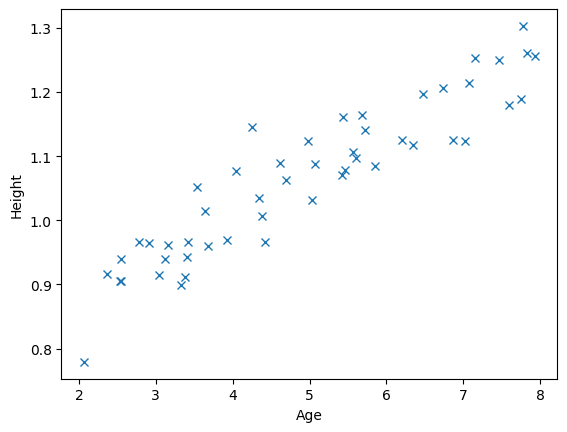

In [1]:
%matplotlib inline
import numpy as np
import pickle
fin = open('data.pkl', 'rb')
x = pickle.load(fin)
y = pickle.load(fin)
fin.close()
print("shape(x) : ", x.shape)
print("shape(y) : ", y.shape)
import matplotlib.pyplot as plt
plt.plot(x, y, 'x')
plt.xlabel('Age')
plt.ylabel('Height')

## Part 1: Linear Regression

We will implement a linear regression for this problem, you know that the linear 
regression assumes that the observed variable $y$ is a linear combination of the 
vector of observation $x$

$$f(x) = x^TA =\sum_{d=1}^D a_{[d]} x_{[d]}$$
with $x_{[D]} = 1$

The linear regression consists in finding the parameters $A$ which minimizes the 
quadratic error:
$$E(A) = \sum_{i=1}^{N}\left(f(x_i) - y_i\right)^2$$

we will solve this problem using two different methods:

**1. Exact solution:**

The vector $A$ which minimize $E(A)$ is defined as follow:
$$A = (XX^T)^{-1}X Y$$

where 
$$X=\left[\begin{matrix}
x_1 & x_2 & ... & x_N\\
1   &  1  & ... &  1
\end{matrix}\right]$$

$$Y=\left[\begin{matrix}
y_1\\
y_2\\
...\\
y_N
\end{matrix}\right]$$

**a-** Compute the vector $A$ wich minimize $E(A)$?

In [2]:
X = np.vstack((x, np.ones(len(x))))
Y = y.reshape((-1, 1))


A = np.linalg.inv(X @ X.T) @ X @ Y
print(A)

[[0.06388117]
 [0.75016254]]


**b-** Plot in the same figure the training data and the straight 
line corresponding to the obtained $A$?

Text(0, 0.5, 'Height')

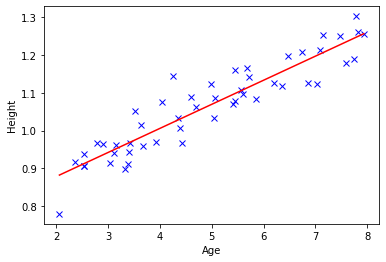

In [3]:
def predict(A, x):
    if(np.isscalar(x)):
        s = 1
        X = np.vstack((x, np.ones(s)))
        return ((X.T @ A)[0][0])
                
    s = x.shape[0] 
    X = np.vstack((x, np.ones(s)))
    return (X.T @ A)


plt.plot(x, y, 'x', c='blue')
pred = predict(A, x)
plt.plot(x, pred, c='red')
plt.xlabel('Age')
plt.ylabel('Height')


**c-** Predict the height of a person of age 3.5 and that of age 7? 

In [4]:
print("height(3.5) = ", predict(A, 3.5))
print("height(7) = ", predict(A, 7))

height(3.5) =  0.9737466173916579
height(7) =  1.1973306977820757


**2. Gradient Descent :**
In this part, we will use the gradient descent algorithm (see convex optimization course) to find the best regression parameters. We will use the batch learning. 

**a-** Give the recurrence formula for $A$ of the algorithm?

$$ A_n = A_{n-1} - 2\eta/N (XX^TA - XY)$$

**b-** Implement a gradient descent with a learning rate $\eta = 0.035$ 
and starting from the origin of the space $A = 0$? Wait until the convergence of the algorithm? (print at each iteration, the number of iteration, the Error and the norm of the gradient)

In [5]:
# starting value for A
A = np.zeros((2, 1))
# Parameters
N = X.shape[1]
eta = 0.035
tol = 1e-3
iter = 1
# saving intermediate results
saveA = A
saveE = np.array(np.linalg.norm(y - predict(A, x))**2/N)
#Loop
while True:
    grad = 2/N * (X @ X.T @ A - X @ Y)
    delta = eta * grad 
    A = A -  delta
    saveA = np.hstack((saveA, A))
    E = np.linalg.norm(y - predict(A, x))**2/N
    saveE = np.hstack((saveE, E))
    normg = np.linalg.norm(grad)
    print("Iteration : ", iter, "E = ", E, " grad norm : ", normg)
    iter = iter + 1 
    if (normg < tol):
        break
print(iter, A)

Iteration :  1 E =  60.61274201573478  grad norm :  11.064593204634097
Iteration :  2 E =  50.13969182077156  grad norm :  10.669994449028952
Iteration :  3 E =  53.39848462322629  grad norm :  10.28947178222644
Iteration :  4 E =  43.88809418464124  grad norm :  9.92252315860663
Iteration :  5 E =  47.13123909859575  grad norm :  9.568664440433823
Iteration :  6 E =  38.48482162652406  grad norm :  9.22742875912108
Iteration :  7 E =  41.6843691102327  grad norm :  8.898365899277785
Iteration :  8 E =  33.81438303714266  grad norm :  8.581041704727669
Iteration :  9 E =  36.94827605618679  grad norm :  8.275037505713629
Iteration :  10 E =  29.77697189503491  grad norm :  7.979949566533608
Iteration :  11 E =  32.82810090879358  grad norm :  7.695388552878852
Iteration :  12 E =  26.28634030392253  grad norm :  7.420979018171746
Iteration :  13 E =  29.241736427266787  grad norm :  7.156358908225566
Iteration :  14 E =  23.26796086919613  grad norm :  6.901179083572633
Iteration :  15

Iteration :  356 E =  1.4864055538237202  grad norm :  0.011256806631217656
Iteration :  357 E =  1.4848971536418338  grad norm :  0.0111746839141939
Iteration :  358 E =  1.4833675677899092  grad norm :  0.011093160421351878
Iteration :  359 E =  1.4818832566390698  grad norm :  0.011012231773540661
Iteration :  360 E =  1.4803799044246764  grad norm :  0.010931893624040902
Iteration :  361 E =  1.4789193092154944  grad norm :  0.010852141658299615
Iteration :  362 E =  1.4774416558213324  grad norm :  0.0107729715936652
Iteration :  363 E =  1.476004406783398  grad norm :  0.010694379179128024
Iteration :  364 E =  1.4745519322632035  grad norm :  0.010616360195065561
Iteration :  365 E =  1.4731376631513584  grad norm :  0.01053891045298884
Iteration :  366 E =  1.4717098618220354  grad norm :  0.010462025795291532
Iteration :  367 E =  1.4703182100987384  grad norm :  0.010385702095006537
Iteration :  368 E =  1.468914589965702  grad norm :  0.010309935255563063
Iteration :  369 E 

**c-** Did you obtain the same result as question 1?

we do not obtain the same result, we have an approximation of the exact Value. This approximation will be more accurate if you ran more iterations (define smaller value of tol)

**d-** To understand the gradient descent, we will display in 3D the curve of the error:

In [6]:
import numpy as np
error = np.zeros((100,100))
a0 = np.linspace(-.2, .45, 100)
a1 = np.linspace(-.1, 1, 100)
for i in range(a0.shape[0]):
    for j in range(a1.shape[0]):
        A = np.array([[a0[i]],[a1[j]]])
        error[i, j] = np.linalg.norm(y - predict(A, x))**2/N

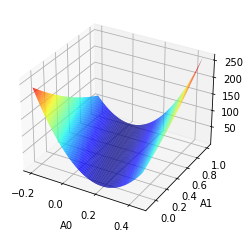

In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(A0, A1, error.T, cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

You can see different views of the plot using the mouse in the interactive mode

**e-** What is the link between this figure and different values of $A$ founded during the iterations of the gradient descent algorithm? Plot the path obtained using the different values of $A$ in the same figure?

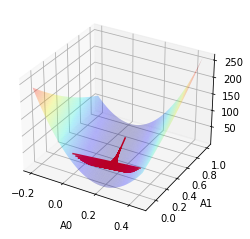

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet, rstride=1, cstride=1, alpha=.3)
ax.plot3D(saveA[0,:], saveA[1,:], saveE, color ='red')
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

**f-** Conclude?

The gradient descent need an important number of iterations, because he don't go directely to the optimum of the error function, and define a path which looks like a zigzag.

**g-** How can we improve the speed of convergence? implement this new method and compare the result with the previous decent algorithm? Plot the path obtained using the different values of A in the same figure for the two algorithms?

In [9]:
A = np.zeros((2, 1))
N = X.shape[1]
tol = 1e-5
iter = 1
NsaveA = A
NsaveE = np.array(np.linalg.norm(y - predict(A, x))**2/N)
ggrad=np.linalg.inv(2/N*(X @ X.T))
while True:
    grad = 2/N * (X @ X.T @ A - X @ Y)
    delta = ggrad @ grad
    A = A - delta
    NsaveA = np.hstack((NsaveA, A))
    E = np.linalg.norm(y - predict(A, x))
    NsaveE = np.hstack((NsaveE, E))
    norm = np.linalg.norm(grad)
    print("Iteration : ", iter, "E = ", E, " grad norm : ", norm)
    iter = iter + 1 
    if (norm < tol):
        break
print(iter, A)

Iteration :  1 E =  8.037884249120427  grad norm :  11.064593204634097
Iteration :  2 E =  8.037884249120445  grad norm :  4.5828629415032935e-15
3 [[0.06388117]
 [0.75016254]]


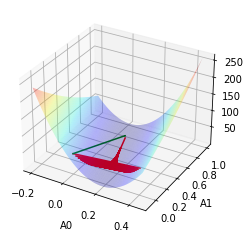

In [10]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet, rstride=1, cstride=1, alpha=.3)
ax.plot3D(saveA[0,:], saveA[1,:], saveE, color ='red')
ax.plot3D(NsaveA[0,:], NsaveA[1,:], NsaveE, color ='green')
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

**h-** To run a linear Regression you can also use the sklearn library.

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X.T, Y)
print("A = ", reg.coef_)
print("height(3.5) = ", reg.predict(np.array([[3.5, 1]])))
print("height(7) = ", reg.predict(np.array([[7, 1]])))
print("Score = ", reg.score(X.T, y.reshape((50,1))))

A =  [[0.06388117 0.75016254]]
height(3.5) =  [[0.97374662]]
height(7) =  [[1.1973307]]
Score =  0.8580632237208231


## Part 2: Regularised Regression 
### Import Data

The following dataset is from Hastie, Tibshirani and Friedman (2009), from a study by Stamey et al. (1989) of prostate cancer, measuring the correlation between the level of a prostate-specific antigen and some covariates. The covariates are
- lcavol : log-cancer volume
-  lweight : log-prostate weight
-  age : age of patient
-  lbhp : log-amount of benign hyperplasia
-  svi : seminal vesicle invasion
-  lcp : log-capsular penetration
-  gleason : Gleason Score,
-  lpsa is the response variable, log-psa.

In [12]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [13]:
fin = open('data2.pkl', 'rb')
xtrain = pickle.load(fin)
ytrain = pickle.load(fin)
Xtest = pickle.load(fin)
Ytest = pickle.load(fin)
fin.close()

print('Train data : ', xtrain.shape, ' ', ytrain.shape)
print('Test data : ', Xtest.shape, ' ', Ytest.shape)

Train data :  (7, 60)   (60,)
Test data :  (7, 37)   (37,)


### Linear Regression

Using the program of Part 1, compute the linear regression weight $w$

$$y = g(x) = W^T x =\sum_{d=0}^7 w_d x_d$$
with $x_0 = 1$

The linear regression consists in finding the parameters $W$ which minimizes the 
quadratic error:
$$E(W) = \frac{1}{60}\sum_{i=1}^{60}\left(g(x_i) - y_i\right)^2$$

The vector $W$ which minimize $E(W)$ is defined as follow:
$$W = (X X^T)^{-1}X Y$$

Compute the vector $W$ wich minimize $E(W)$ :
- Compute $w$ using the exact solution
- Compute the error on test data

In [14]:
X=np.vstack((np.ones(xtrain.shape[1]),xtrain))
W=np.linalg.inv(X @ X.T) @ X @ ytrain
print(W)

[-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]


- Check that you obtain the same $W$ with sklean.linear_model.LinearRegression?

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain.T, ytrain.reshape((60,1)))
print("A = ", reg.coef_)

A =  [[ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
   0.38558413]]


In [16]:
print(reg.intercept_)

[-1.37427705]


### Ridge regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_2^2$$ 

- Using linear_model.Ridge and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [17]:
lridge = linear_model.Ridge(alpha = 0.)

lridge.fit(xtrain.T, ytrain)
print('W =', lridge.coef_)
e = np.mean((lridge.predict(Xtest.T) - Ytest) ** 2)
print('Erreur = ', e)

W = [ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
  0.38558413]
Erreur =  2.8641499657014404


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a ridge regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [18]:
# Data Normalisation
## Compute Mean and Standard deviation of input features
mx = xtrain.mean(axis=-1)
sx = xtrain.std(axis=-1)
## Compute Mean of target 
my = ytrain.mean()
print(mx, sx)
print(my)

## Normalize train and test input feature
xtrainN = (xtrain - mx.reshape((xtrain.shape[0], 1))) / sx.reshape((xtrain.shape[0], 1))
XtestN = (Xtest - mx.reshape((xtrain.shape[0], 1))) / sx.reshape((xtrain.shape[0], 1))

## Center target Values
ytrainN = (ytrain - my)
YtestN = (Ytest - my)

# check mean and std of normalized data 
mxn = xtrainN.mean(axis=-1)
sxn = xtrainN.std(axis=-1)
myn = ytrainN.mean()
print(mxn, sxn)
print(myn)

[ 8.17244409e-01  3.51215118e+00  6.25166667e+01  1.75116900e-02
  3.33333333e-02 -7.34113259e-01  6.58333333e+00] [1.01380008 0.40245966 7.38126382 1.4165258  0.17950549 1.04039938
 0.69020931]
1.8097563316666665
[-1.85037171e-17  3.70074342e-16  1.17036011e-16 -1.48029737e-17
 -2.96059473e-17  1.66533454e-16  3.51570624e-16] [1. 1. 1. 1. 1. 1. 1.]
1.8133642735544223e-16


In [19]:
# Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler(with_std=False)

xtrainN = scalerx.fit_transform(xtrain.T)
ytrainN = scalery.fit_transform(ytrain.reshape(-1, 1)).ravel()
print(scalerx.mean_, scalerx.var_)
print(scalery.mean_)

XtestN = scalerx.transform(Xtest.T)
YtestN = scalery.transform(Ytest.reshape(-1, 1)).ravel()
print(ytrainN.std())

[ 8.17244409e-01  3.51215118e+00  6.25166667e+01  1.75116900e-02
  3.33333333e-02 -7.34113259e-01  6.58333333e+00] [1.02779060e+00 1.61973781e-01 5.44830556e+01 2.00654534e+00
 3.22222222e-02 1.08243087e+00 4.76388889e-01]
[1.80975633]
0.80431517264015


In [20]:
alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    rr = linear_model.Ridge(alpha=a)
    rr.fit(xtrainN, ytrainN)
    yp = rr.predict(xtrainN)
    e1 = np.mean((ytrainN - yp)**2)
    ytp = rr.predict(XtestN)
    e2 = np.mean((YtestN - ytp)**2)
    e.append(np.array([e1, e2]))
    w.append(rr.coef_)

e=np.array(e).T
w=np.array(w).T
print(e.shape)
print(w.shape)

(2, 200)
(7, 200)


- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

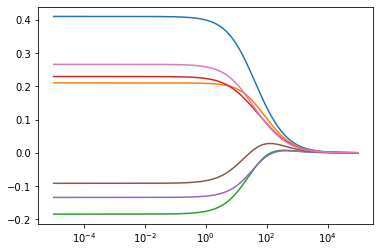

In [21]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])

plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

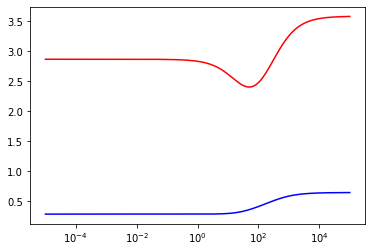

In [22]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on test data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()

- Conclude? (Which is the best value for $\alpha$)

- the best $\alpha$ = $\alpha^*$ should be the optimum of the red curve
- foreach $\alpha < \alpha^*$ you are in the overfitting case
- foreach $\alpha > \alpha^*$ you are in the underfitting case
- you obtain the best generalization error for $\alpha^*$

### Lasso regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{2 \times 60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_1$$

- Using linear_model.Lasso and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [23]:
print(alphas[0])

1e-05


In [24]:
rr = linear_model.Lasso(alpha=0).fit(xtrain.T, ytrain)
print(rr.coef_)
e = np.mean((rr.predict(Xtest.T) - Ytest) ** 2)
print('Erreur = ', e)

[ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
  0.38558413]
Erreur =  2.8641499657014413


/var/folders/75/1cw24wqn0nl920j2y9rvvgj80000gn/T/ipykernel_13870/3177897813.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rr = linear_model.Lasso(alpha=0).fit(xtrain.T, ytrain)
/Users/reda/pythonEnv/Py39Sys/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/reda/pythonEnv/Py39Sys/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.633246593799855, tolerance: 0.003881537381634925
  model = cd_fast.enet_coordinate_descent(


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a Lasso regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [25]:
alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    rr = linear_model.Lasso(alpha=a)
    rr.fit(xtrainN, ytrainN)
    yp = rr.predict(xtrainN)
    e1 = np.mean((ytrainN - yp)**2)
    ytp = rr.predict(XtestN)
    e2 = np.mean((YtestN - ytp)**2)
    e.append(np.array([e1, e2]))
    w.append(rr.coef_)

e=np.array(e).T
w=np.array(w).T
print(e.shape)
print(w.shape)

(2, 200)
(7, 200)


- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

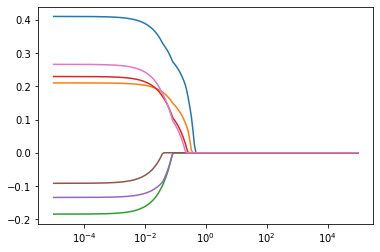

In [26]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])

plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

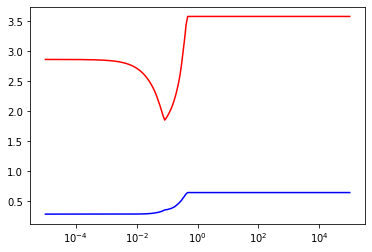

In [27]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()

- Conclude? (Which is the best value for $\alpha$

- the best $\alpha$ = $\alpha^*$ should be the optimum of the red curve
- foreach $\alpha < \alpha^*$ you are in the overfitting case
- foreach $\alpha > \alpha^*$ you are in the underfitting case
- you obtain the best generalization error for $\alpha^*$

- Compare the result with ridge solution?

We have better generalization error for the Lasso Method in this case.